In [1]:
import ROOT
%jsroot on

Welcome to JupyROOT 6.16/00


In [2]:
import matplotlib.pyplot as plt
import pandas as pd  
import numpy as np

import sys, os
import socket
import glob
import time
import shutil
import math

In [3]:
file='data/Tracker_140323_1503.txt.root'
rfile = ROOT.TFile.Open(file)

rfile.ls()

TFile**		data/Tracker_140323_1503.txt.root	
 TFile*		data/Tracker_140323_1503.txt.root	
  KEY: TTree	tdata;1	data


In [4]:
for key in rfile.GetListOfKeys():
    name = key.GetName()
    entries = rfile.Get(name).GetEntries()
    print('{} : {}'.format(name, entries))

tdata : 68000


In [5]:
tree = rfile.Get(name)
tree.Print()

******************************************************************************
*Tree    :tdata     : data                                                   *
*Entries :    68000 : Total =         7104796 bytes  File  Size =    2829838 *
*        :          : Tree compression factor =   2.51                       *
******************************************************************************
*Br    0 :SCINT_COUNT : SCINTS_COUNT/I                                       *
*Entries :    68000 : Total  Size=     273223 bytes  File Size  =      12944 *
*Baskets :        9 : Basket Size=      32000 bytes  Compression=  21.07     *
*............................................................................*
*Br    1 :SCINT_INDEX : SCINT_INDEX[SCINTS_COUNT]/I                          *
*Entries :    68000 : Total  Size=     837458 bytes  File Size  =     235283 *
*Baskets :       35 : Basket Size=      32000 bytes  Compression=   3.55     *
*...................................................

In [6]:
for b in tree.GetListOfBranches():
    print(b.GetName(), end=', ')

SCINT_COUNT, SCINT_INDEX, SCINT_TIME, WIRES_COUNT, WIRE_INDEX, WIRE_TIME, 

In [7]:
tree.Show(0)

======> EVENT:0
 SCINTS_COUNT    = 2
 SCINT_INDEX     = 2, 
                  7
 SCINT_TIME      = 2117, 
                  1351
 WIRES_COUNT     = 6
 WIRE_INDEX      = 10, 
                  22, 42, 68, 81, 93
 WIRE_TIME       = 1129, 
                  1034, 960, 654, 1281, 790


In [17]:
sdy = 170 #distanza lungo y tra scint. e DC
sy = 250 #dimensioni y scintillatore
stsbz = 3245 #distanza scint. top scint. bottom
#st0z = #distanza scint top dall'origine lungo z
sb0z = 0 #distanza scint bottom dall'origine lungo z
d0x = 0 #distanza DC dall'origine lungo x
d0y = 0 #distanza DC dall'origine lungo y
cdx = 88.75 #distanza ibeam - bordo della camera lungo x
cdy = 88.75 #distanza ibeam - bordo della camera lungo y
xc = 92 #dimensioni cella lungo x = lungo y
zc = 29 #dimensioni cella lungo z
zz0=2850
wibeam = 1.5

In [18]:
ich = np.arange(0, 12)

wires0011_x = (d0x + cdx) + (xc/2 + wibeam/2) + (xc+wibeam)*ich
wires1223_x = (xc/2 + wibeam/2) + wires0011_x
wires4859_x = wires0011_x
wires6071_x = wires1223_x

wires0011_z = np.zeros_like(ich)+zc/2
wires1223_z = wires0011_z+zc
wires4859_z = wires0011_z+zz0
wires6071_z = wires1223_z+zz0

CH=np.concatenate([ich, ich+12, ich+48, ich+60])
X=np.concatenate([wires0011_x, wires1223_x, wires4859_x, wires6071_x])
Z=np.concatenate([wires0011_z, wires1223_z, wires4859_z, wires6071_z])
wire = dict({'ch': CH , 'x': X, 'z': Z})

In [19]:
def geometry(a, bottom, top):
    if bottom == True :
        a.scatter(wires0011_x, wires0011_z, color='gray', s=10)
        a.scatter(wires1223_x, wires1223_z, color='gray', s=10)
        a.axhline(y=wires0011_z[0], color='gray', linestyle='-')
        a.axhline(y=wires1223_z[0], color='gray', linestyle='-')
        
    if top == True :
        a.scatter(wires4859_x, wires4859_z, color='gray', s=10)
        a.scatter(wires6071_x, wires6071_z, color='gray', s=10)
        a.axhline(y=wires4859_z[0], color='gray', linestyle='-')
        a.axhline(y=wires6071_z[0], color='gray', linestyle='-')
    
    return

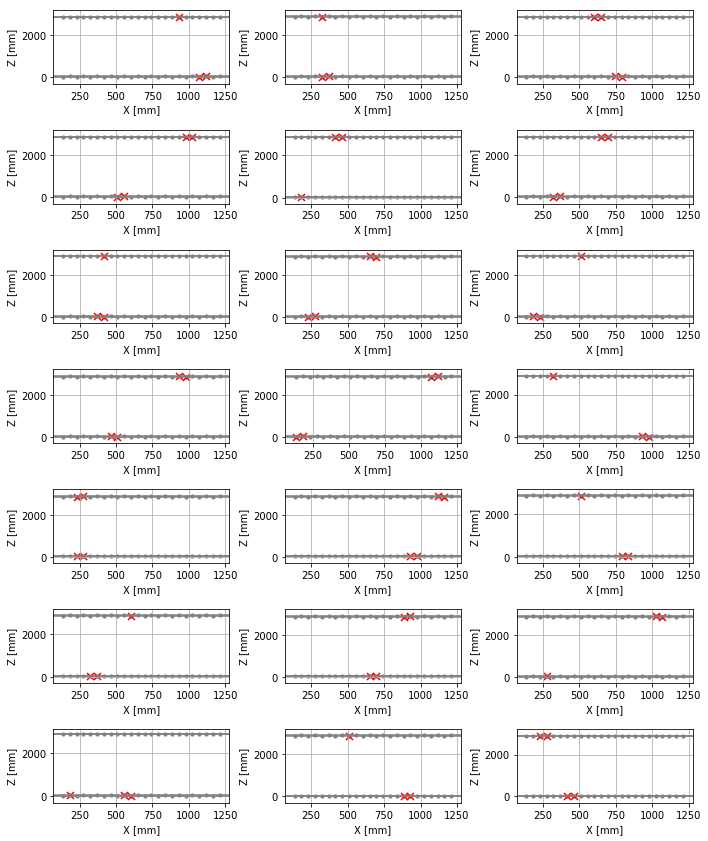

In [20]:
bottom=True
top=True

t=tree

# piano bottom

plots_per_row=3
FRAMES=np.arange(0, 21)
fig, axs = plt.subplots(math.ceil(len(FRAMES)/plots_per_row), plots_per_row, figsize=(10, 12))
fig.tight_layout(pad=2.5)
    
i=0
j=0

for ev in FRAMES:
    tree.GetEntry(ev)
    geometry(axs[i][j], bottom, top)
    for c in range(t.WIRES_COUNT):
        ch = t.WIRE_INDEX[c]
        if ch < 24 and bottom: 
            axs[i][j].scatter(wire['x'][wire['ch']==ch][0], wire['z'][wire['ch']==ch][0], color='red', marker='x', s=50)
        if 48 <= ch < 71 and top: 
            axs[i][j].scatter(wire['x'][wire['ch']==ch][0], wire['z'][wire['ch']==ch][0], color='red', marker='x', s=50)
    axs[i][j].grid()
    axs[i][j].set_xlabel('X [mm]')
    axs[i][j].set_ylabel('Z [mm]')
    
    j+=1
    if j%plots_per_row==0:
        i+=1
        j=0